In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('D:/DATA SCIENCE/Online Retail/data.csv', encoding='ISO-8859-1')

In [30]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


# Data Cleaning

In [31]:
# Menghapus data duplikat
data.drop_duplicates(inplace=True)

In [32]:
# Menghapus transaksi yang tidak valid (Quantity <= 0 dan UnitPrice < 0)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [33]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [34]:
# Hitung total revenue
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
 8   Revenue      524878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.0+ MB
None


# Analisis Data

Total Pendapatan

In [36]:
total_revenue = data['Revenue'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $10642110.80


Trend penjualan

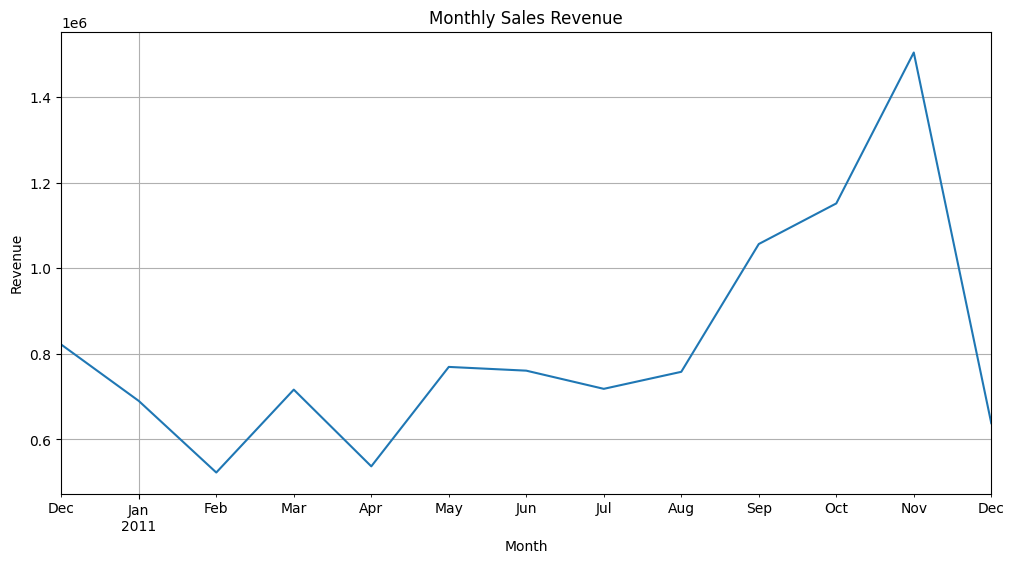

In [43]:
# Group by InvoiceDate to get monthly sales
monthly_sales = data.resample('M', on='InvoiceDate').sum()['Revenue']

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.savefig('Visualisasi/monthly_sales_revenue.png')
plt.show()

Produk Terlaris

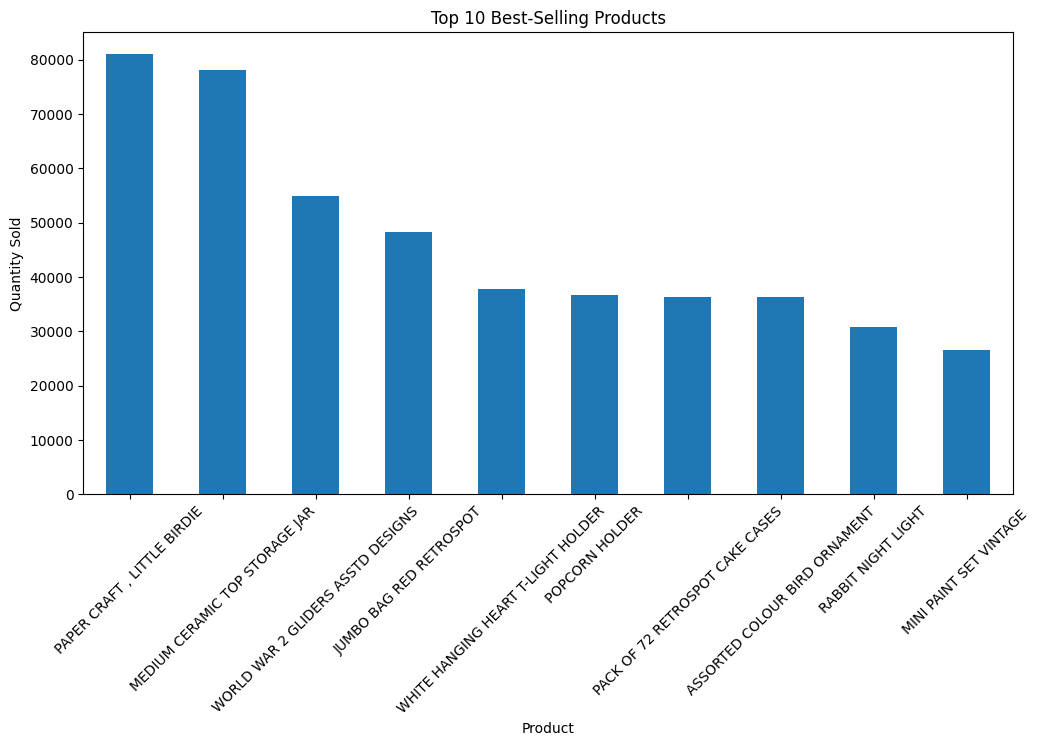

In [41]:
# Group by Description to find top products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.savefig('Visualisasi/top_best_selling_products.png') 
plt.show()

Analisis berdasarkan negara

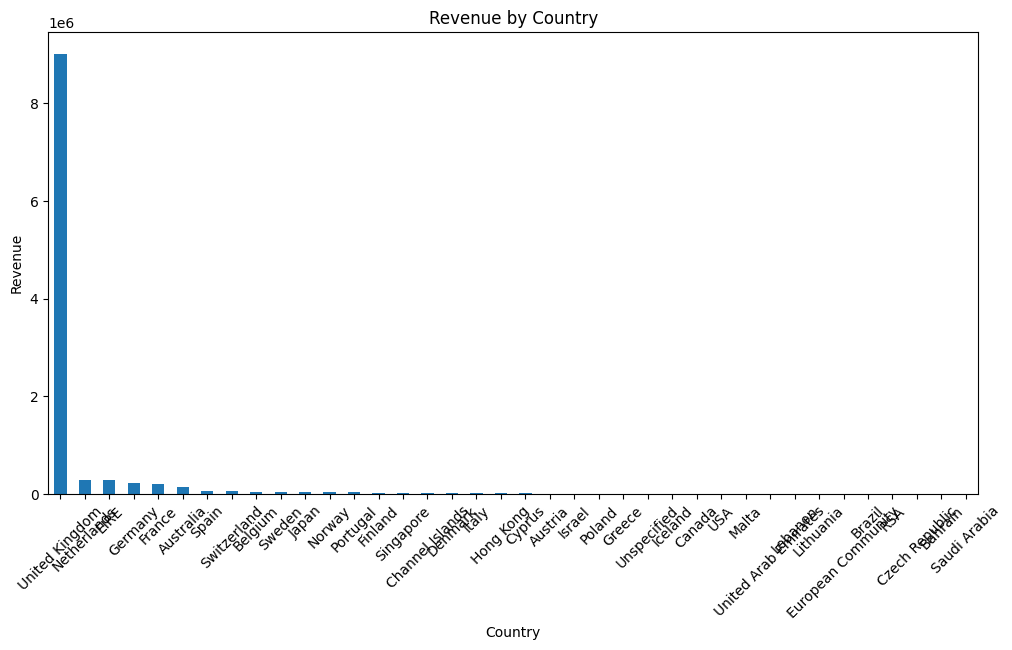

In [42]:
# Group by Country to see revenue by country
country_revenue = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
country_revenue.plot(kind='bar')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.savefig('Visualisasi/revenue_by_country.png')
plt.show()